# 1.Max Revenue and Dynamic programming

In [1]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [2]:
from collections import defaultdict

In [3]:
price = defaultdict(int)

In [4]:
price[10]

0

In [5]:
for i,op in enumerate(original_price):
    price[i+1] = op

In [6]:
price[10]

30

In [7]:
price[20]

0

In [8]:
def r(n):
    return max([price[n]]+[r(n-i)+r(i) for i in range(1,n//2+1)])

In [9]:
r(20)

60

In [10]:
def r_test(n):
    rs = ''
    for i in range(1,n//2+1):
        rs += ',(r('+str(i)+')+r('+str(n-i)+'))'
    print('比较集:','price['+str(n)+']'+rs)
    return max([price[n]]+[r(n-i)+r(i) for i in range(1,n//2+1)])

In [11]:
r_test(10)

比较集: price[10],(r(1)+r(9)),(r(2)+r(8)),(r(3)+r(7)),(r(4)+r(6)),(r(5)+r(5))


30

In [12]:
solution = {}

In [13]:
def r(n):
    rs = ''
    for i in range(1,n//2+1):
        rs += ',(r('+str(i)+')+r('+str(n-i)+'))'
    max_revenue,max_split = max([(price[n],0)]+[(r(n-i)+r(i),i) for i in range(1,n//2+1)],key = lambda x:x[0])
    #print(max([(price[n],0)]+[(r(n-i)+r(i),i) for i in range(1,n)]))
    #result = max([(price[n],0)]+[(get_rev(n-i)+get_rev(i),i) for i in range(1,n//2+1)])
    solution[n] = (max_split,n-max_split)
    return max_revenue
    #return result

In [14]:
r(20)

60

In [15]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (0, 11),
 12: (1, 11),
 13: (2, 11),
 14: (3, 11),
 15: (2, 13),
 16: (2, 14),
 17: (6, 11),
 18: (1, 17),
 19: (2, 17),
 20: (3, 17)}

In [16]:
def cut_step(n):

    left_len,right_len = solution[n]
    if left_len == 0: return [right_len]
    
    return cut_step(left_len)+cut_step(right_len)
    

In [17]:
cut_step(20)

[3, 6, 11]

## 1.1 use dynamic programming

In [18]:
revenue_list = {}

In [19]:
def r(n):
    if n in revenue_list:return revenue_list[n]
    result = max([price[n]]+[r(n-i)+r(i) for i in range(1,n//2+1)])
    revenue_list[n] = result
    return result
    

In [20]:
r(380)

1207

In [21]:
revenue_list

{1: 1,
 2: 5,
 3: 8,
 4: 10,
 5: 13,
 6: 17,
 7: 18,
 8: 22,
 9: 25,
 10: 30,
 11: 35,
 12: 36,
 13: 40,
 14: 43,
 15: 45,
 16: 48,
 17: 52,
 18: 53,
 19: 57,
 20: 60,
 21: 65,
 22: 70,
 23: 71,
 24: 75,
 25: 78,
 26: 80,
 27: 83,
 28: 87,
 29: 88,
 30: 92,
 31: 95,
 32: 100,
 33: 105,
 34: 106,
 35: 110,
 36: 113,
 37: 115,
 38: 118,
 39: 122,
 40: 123,
 41: 127,
 42: 130,
 43: 135,
 44: 140,
 45: 141,
 46: 145,
 47: 148,
 48: 150,
 49: 153,
 50: 157,
 51: 158,
 52: 162,
 53: 165,
 54: 170,
 55: 175,
 56: 176,
 57: 180,
 58: 183,
 59: 185,
 60: 188,
 61: 192,
 62: 193,
 63: 197,
 64: 200,
 65: 205,
 66: 210,
 67: 211,
 68: 215,
 69: 218,
 70: 220,
 71: 223,
 72: 227,
 73: 228,
 74: 232,
 75: 235,
 76: 240,
 77: 245,
 78: 246,
 79: 250,
 80: 253,
 81: 255,
 82: 258,
 83: 262,
 84: 263,
 85: 267,
 86: 270,
 87: 275,
 88: 280,
 89: 281,
 90: 285,
 91: 288,
 92: 290,
 93: 293,
 94: 297,
 95: 298,
 96: 302,
 97: 305,
 98: 310,
 99: 315,
 100: 316,
 101: 320,
 102: 323,
 103: 325,
 104: 328

## 1.2 utilize decorator

### 1.2.1 keep recording of the called function

In [22]:
call_f_times = defaultdict(int)
value_record = defaultdict(int)

In [23]:
def get_call_times(f):
    f_name = f.__name__
    def count_times(n):
        if (f_name,n) in call_f_times: return value_record[(f_name,n)]
        result = f(n)
        value_record[(f_name,n)] = result

        call_f_times[(f_name,n)] += 1
        return result
    return count_times

In [24]:
def check_value(f):
    f_name = f.__name__
    def get_value(n):
        
        if (f_name,n) in value_record:
            #print('Counted!Check the list!')
            return value_record[(f_name,n)]
        #print('New value!Just count it!')
        result = f(n)
        value_record[(f_name,n)] = result
        return result
    return get_value

In [25]:
def add_ten(n):
    return n + 10

In [26]:
def mul_ten(n):
    return n * 10

In [27]:
add_ten_fake = get_call_times(add_ten)

In [28]:
add_ten_fake(20)

30

In [29]:
add_ten_fake(10)

20

In [30]:
#call_f_times

In [31]:
add_ten(10)

20

In [32]:
add_ten(20)

30

In [33]:
#call_f_times

In [34]:
get_call_times(mul_ten)(10)

100

In [35]:
#call_f_times

In [36]:
@get_call_times
def power_two(n):
    return n**2

In [37]:
power_two(10)

100

In [38]:
call_f_times

defaultdict(int,
            {('add_ten', 20): 1,
             ('add_ten', 10): 1,
             ('mul_ten', 10): 1,
             ('power_two', 10): 1})

In [39]:
cut_scheme = {}

In [40]:
@get_call_times
def r(n):
    max_revenue,max_split = max([(price[n],0)]+[(r(n-i)+r(i),i) for i in range(1,n//2+1)],key=lambda x:x[0])
    cut_scheme[n] = (n-max_split,max_split)
    return max_revenue

In [41]:
call_f_times = defaultdict(int)
value_record = defaultdict(int)
r(10)

30

In [42]:
call_f_times

defaultdict(int,
            {('r', 1): 1,
             ('r', 2): 1,
             ('r', 3): 1,
             ('r', 4): 1,
             ('r', 5): 1,
             ('r', 6): 1,
             ('r', 7): 1,
             ('r', 8): 1,
             ('r', 9): 1,
             ('r', 10): 1})

In [43]:
cut_scheme

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0)}

In [44]:
@get_call_times
@check_value
def r1(n):
    max_revenue,max_split = max([(price[n],0)]+[(r1(n-i)+r1(i),i) for i in range(1,n//2+1)],key=lambda x:x[0])
    cut_scheme[n] = (n-max_split,max_split)
    return max_revenue

In [45]:
value_record = {}
call_f_times = defaultdict(int)
r1(180)

570

In [46]:
value_record

{('r1', 1): 1,
 ('get_value', 1): 1,
 ('r1', 2): 5,
 ('get_value', 2): 5,
 ('r1', 3): 8,
 ('get_value', 3): 8,
 ('r1', 4): 10,
 ('get_value', 4): 10,
 ('r1', 5): 13,
 ('get_value', 5): 13,
 ('r1', 6): 17,
 ('get_value', 6): 17,
 ('r1', 7): 18,
 ('get_value', 7): 18,
 ('r1', 8): 22,
 ('get_value', 8): 22,
 ('r1', 9): 25,
 ('get_value', 9): 25,
 ('r1', 10): 30,
 ('get_value', 10): 30,
 ('r1', 11): 35,
 ('get_value', 11): 35,
 ('r1', 12): 36,
 ('get_value', 12): 36,
 ('r1', 13): 40,
 ('get_value', 13): 40,
 ('r1', 14): 43,
 ('get_value', 14): 43,
 ('r1', 15): 45,
 ('get_value', 15): 45,
 ('r1', 16): 48,
 ('get_value', 16): 48,
 ('r1', 17): 52,
 ('get_value', 17): 52,
 ('r1', 18): 53,
 ('get_value', 18): 53,
 ('r1', 19): 57,
 ('get_value', 19): 57,
 ('r1', 20): 60,
 ('get_value', 20): 60,
 ('r1', 21): 65,
 ('get_value', 21): 65,
 ('r1', 22): 70,
 ('get_value', 22): 70,
 ('r1', 23): 71,
 ('get_value', 23): 71,
 ('r1', 24): 75,
 ('get_value', 24): 75,
 ('r1', 25): 78,
 ('get_value', 25): 78,

In [47]:
call_f_times

defaultdict(int,
            {('get_value', 1): 1,
             ('get_value', 2): 1,
             ('get_value', 3): 1,
             ('get_value', 4): 1,
             ('get_value', 5): 1,
             ('get_value', 6): 1,
             ('get_value', 7): 1,
             ('get_value', 8): 1,
             ('get_value', 9): 1,
             ('get_value', 10): 1,
             ('get_value', 11): 1,
             ('get_value', 12): 1,
             ('get_value', 13): 1,
             ('get_value', 14): 1,
             ('get_value', 15): 1,
             ('get_value', 16): 1,
             ('get_value', 17): 1,
             ('get_value', 18): 1,
             ('get_value', 19): 1,
             ('get_value', 20): 1,
             ('get_value', 21): 1,
             ('get_value', 22): 1,
             ('get_value', 23): 1,
             ('get_value', 24): 1,
             ('get_value', 25): 1,
             ('get_value', 26): 1,
             ('get_value', 27): 1,
             ('get_value', 28): 1,
            

# 2.Edit distance

In [48]:
solution = defaultdict(str)
lru = defaultdict(int)

In [49]:
def lru_cache(f):
    def pro(str1,str2):
        
        if (str1,str2) in lru: return lru[(str1,str2)]

        distance = f(str1,str2)
        lru[(str1,str2)] = distance

        return distance
    return pro

### Tips: 
    1. 原版程序为注释部分
    2. 添加空字符转换操作部分
    3. 修复了一个bug: 转化字符串首字符在当前字符串有且仅出现一次，但在不在目标字符串首出现且出现次数≥1，会导致转换错误 
        eg : XGEFADG => GH   原版会转换成 GGH
        cz : 倒数第二步骤 'XG' 与 'G'比较后，下一步骤应是 'X'与 '' 比较(原版仍是'X'与'G'比较，因为此时len(str2)==0，直接返回了len(str1))
        

In [50]:
#@lru_cache(maxsize=2**10)
@lru_cache
def edit_distance(string1, string2):
    
    #if len(string1) == 0:
    #    return len(string2)
    #if len(string2) == 0:
    #    return len(string1)
    
    if len(string1) == 0 and len(string2) == 0: return 0
    
    #tail_s1 = string1[-1]
    #tail_s2 = string2[-1]
    
    tail_s1 = ''
    tail_s2 = ''
    candidates = []
    
    #candidates = [
    #    (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
    #    (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    #]
    
    if len(string1) == 0:
        
        tail_s1 = string1
        tail_s2 = string2[-1]
        candidates = [(edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
                    ]

    elif len(string2) == 0:
        tail_s1 = string1[-1]
        tail_s2 = string2                        
        candidates = [(edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
                    ]
        
    else:
        
        tail_s1 = string1[-1]
        tail_s2 = string2[-1]
        
        candidates = [
            (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
            (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
        ]
        
        if tail_s1 == tail_s2:
            both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')    
        else:
            both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))    
        
        candidates.append(both_forward)

    #if tail_s1 == tail_s2:
    #    both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    #else:
    #    both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))
    
    #candidates.append(both_forward)


    min_distance, operation = min(candidates, key=lambda x: x[0])

    solution[(string1, string2)] = operation 

    return min_distance

In [51]:
edit_distance('BAHCDGXZ','XGEFADG')

7

In [52]:
solution = defaultdict(str)
lru = defaultdict(int)
str1,str2 = 'XGEFADG','GHDzctyah'
edit_distance(str1,str2)

9

In [53]:
solution

defaultdict(str,
            {('', 'G'): 'ADD G',
             ('', 'GH'): 'ADD H',
             ('', 'GHD'): 'ADD D',
             ('', 'GHDz'): 'ADD z',
             ('', 'GHDzc'): 'ADD c',
             ('', 'GHDzct'): 'ADD t',
             ('', 'GHDzcty'): 'ADD y',
             ('', 'GHDzctya'): 'ADD a',
             ('', 'GHDzctyah'): 'ADD h',
             ('X', ''): 'DEL X',
             ('X', 'G'): 'SUB X => G',
             ('X', 'GH'): 'ADD H',
             ('X', 'GHD'): 'ADD D',
             ('X', 'GHDz'): 'ADD z',
             ('X', 'GHDzc'): 'ADD c',
             ('X', 'GHDzct'): 'ADD t',
             ('X', 'GHDzcty'): 'ADD y',
             ('X', 'GHDzctya'): 'ADD a',
             ('X', 'GHDzctyah'): 'ADD h',
             ('XG', ''): 'DEL G',
             ('XG', 'G'): '',
             ('XG', 'GH'): 'ADD H',
             ('XG', 'GHD'): 'ADD D',
             ('XG', 'GHDz'): 'ADD z',
             ('XG', 'GHDzc'): 'ADD c',
             ('XG', 'GHDzct'): 'ADD t',
             ('X

In [54]:
def parse_solution(str1,str2):
    
    if str1 == str2: return []
    
    ops = solution[(str1,str2)].split(' ')
    op = [str1,ops[0],ops[-1]]
    
    if op[1] == 'ADD': return [op]+parse_solution(str1,str2[:-1])
    
    elif op[1] == 'DEL': return  [op]+parse_solution(str1[:-1],str2)
    
    elif op[1] == 'SUB': return [op]+parse_solution(str1[:-1],str2[:-1])
    
    else:
        mid_str = str1
        if len(str1) > len(str2) and len(str2) == 0:
            return [op]+parse_solution(str1[:-1],str2)
        elif len(str1) < len(str2) and len(str1) == 0 : 
            return [op]+parse_solution(str1,str2[:-1])
        else: return [op]+parse_solution(str1[:-1],str2[:-1])
        
    return [op]

In [55]:
ops = parse_solution(str1,str2)

In [56]:
str1,str2

('XGEFADG', 'GHDzctyah')

In [57]:
ops

[['XGEFADG', 'ADD', 'h'],
 ['XGEFADG', 'ADD', 'a'],
 ['XGEFADG', 'ADD', 'y'],
 ['XGEFADG', 'SUB', 't'],
 ['XGEFAD', 'SUB', 'c'],
 ['XGEFA', 'SUB', 'z'],
 ['XGEF', 'SUB', 'D'],
 ['XGE', 'SUB', 'H'],
 ['XG', '', ''],
 ['X', 'DEL', 'X']]

In [58]:
def ed_proc(str1,str2): 
    j = 0  #代表str1的末尾index
    op_times = 0
    mid_str = str1 #记录str1操作部分
    print('{} => {} 转换过程：'.format(str1,str2))
    print('')
    if len(str1) == 0: j = 0
    else: j = len(str1)
    for i , op in enumerate(ops):
        if op[1] == 'ADD':#+操作
            op_times+=1 
            if j == 0:
                mid_str = ''
                mid_str = mid_str + op[2] + str1
                if str1 == '':
                    print('Step{}: 添加 {} 字符 => {}'.format(op_times,op[2],mid_str))
                else:
                    print('Step{}: {} 在第{}个字符 {} 前添加 {} 字符 => {}'.format(op_times,str1,j+1,str1[j],op[2],mid_str))
            else:
                mid_str = str1[:j]                    #操作部分为当前索引处前段
                mid_str = mid_str + op[2]                 #添上要加字符
                mid_str = mid_str + str1[j:]          #加上后段
                print('Step{}: {} 在第{}个字符 {} 后添加 {} 字符 => {}'.format(op_times,str1,j,str1[j-1],op[2],mid_str))         
            j = j                                   #索引不变
            str1 = mid_str                          #更新str1
        elif op[1] == 'SUB':                       #替换操作
            #索引指向当前操作部分末尾
            mid_str = str1[:j-1]                      #保留前段
            mid_str = mid_str + op[2]               #替换末字符
            mid_str = mid_str + str1[j:]          #连上后段
            op_times+=1
            print('Step{}: {} 将第{}个字符 {} 替换成 {} 字符 => {}'.format(op_times,str1,j,str1[j-1],op[2],mid_str))
            if j == 0: j = 0
            else : j = j - 1                        #索引退1
            str1 = mid_str
                                  
        elif op[1] == 'DEL':                        #删除操作
            #索引指向当前操作部分末尾
            mid_str = str1[:j-1]                       #保留前段
            mid_str = mid_str + str1[j:]           #删除末字符并连上后段
            op_times+=1
            print('Step{}: {} 删除第{}个字符 {} => {}'.format(op_times,str1,j,op[2],mid_str))
            if j == 0: j = 0
            else: j = j - 1                         #索引退1
            str1 = mid_str
        else:
            if j == 0: j = 0
            else: j = j - 1                      #索引退1
            
            str1 = mid_str
            
    if str1 == str2: 
        print('')
        print('Done!!!')
    else:
        print('')
        print('Transforming Defeated!!!')

In [59]:
ed_proc(str1,str2)

XGEFADG => GHDzctyah 转换过程：

Step1: XGEFADG 在第7个字符 G 后添加 h 字符 => XGEFADGh
Step2: XGEFADGh 在第7个字符 G 后添加 a 字符 => XGEFADGah
Step3: XGEFADGah 在第7个字符 G 后添加 y 字符 => XGEFADGyah
Step4: XGEFADGyah 将第7个字符 G 替换成 t 字符 => XGEFADtyah
Step5: XGEFADtyah 将第6个字符 D 替换成 c 字符 => XGEFActyah
Step6: XGEFActyah 将第5个字符 A 替换成 z 字符 => XGEFzctyah
Step7: XGEFzctyah 将第4个字符 F 替换成 D 字符 => XGEDzctyah
Step8: XGEDzctyah 将第3个字符 E 替换成 H 字符 => XGHDzctyah
Step9: XGHDzctyah 删除第1个字符 X => GHDzctyah

Done!!!


In [60]:
solution = defaultdict(str)
lru = defaultdict(int)
str1,str2 = 'XGEFADG','AH'
edit_distance(str1,str2)
ops = parse_solution(str1,str2)
ed_proc(str1,str2)

XGEFADG => AH 转换过程：

Step1: XGEFADG 删除第7个字符 G => XGEFAD
Step2: XGEFAD 将第6个字符 D 替换成 H 字符 => XGEFAH
Step3: XGEFAH 删除第4个字符 F => XGEAH
Step4: XGEAH 删除第3个字符 E => XGAH
Step5: XGAH 删除第2个字符 G => XAH
Step6: XAH 删除第1个字符 X => AH

Done!!!


In [61]:
solution = defaultdict(str)
lru = defaultdict(int)
str1,str2 = '','XGEFADG'
edit_distance(str1,str2)
ops = parse_solution(str1,str2)
ed_proc(str1,str2)

 => XGEFADG 转换过程：

Step1: 添加 G 字符 => G
Step2: G 在第1个字符 G 前添加 D 字符 => DG
Step3: DG 在第1个字符 D 前添加 A 字符 => ADG
Step4: ADG 在第1个字符 A 前添加 F 字符 => FADG
Step5: FADG 在第1个字符 F 前添加 E 字符 => EFADG
Step6: EFADG 在第1个字符 E 前添加 G 字符 => GEFADG
Step7: GEFADG 在第1个字符 G 前添加 X 字符 => XGEFADG

Done!!!


### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

A: 使用动态规划可以减少重复的迭代次数，它通过将计算过的函数值保存在一张表中，并在后续直接查表返回值。

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

A: 动态规划对于一些可拆分为很多相似子问题的问题仍旧是行之有效的算法，机器学习也可用于解决这些问题，单往往并不是最佳选择

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

A：1. 地图路径规划  2. 网络爬虫  3. 文本相似度分析

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

A: 1. 输入法联想 2. 文本相似度分析  3. 语音识别

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

A: 
   1. 问题可拆分为多个相似子问题。---即是说子问题的输入是总输入的一部分，解决子问题的方法与主问题一致。
   2. 逐一解决子问题，并将其保存在一张表中。---对于重复出现的子问题通过查表直接获得输出
   3. 将子问题的解通过查表拼装得出最终解。---主问题的解是通过查表然后拼接获得最终输出

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

A: 
  1. 子问题划分需要经验，子问题之间必须不独立；
  2. 子问题规模过大会导致其解集空间度过于复杂，需要较大内存；
  3. 子问题如不是最优，则动态规划也不是全局最优。

# option question

In [62]:
import random
import math
import matplotlib.pylab as plt

In [63]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitudes = [random.randint(-100, 100) for _ in range(20)]

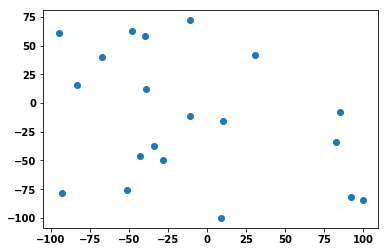

In [64]:
plt.scatter(latitudes, longitudes)

In [107]:
p_start = (-50, 10)

In [110]:
def cal_dist2(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

In [171]:
cal_dist2(points[19],points[6])

109.29318368498559

In [172]:
points

[(9, -100),
 (-43, -46),
 (-39, 12),
 (-40, 58),
 (-51, -76),
 (10, -16),
 (-28, -50),
 (-95, 61),
 (-83, 16),
 (-93, -78),
 (-34, -37),
 (92, -82),
 (85, -8),
 (-48, 63),
 (-67, 40),
 (-11, -11),
 (-11, 72),
 (100, -84),
 (83, -34),
 (31, 42),
 (-50, 10)]

In [161]:
def k_shortest(origin,points):
    #search points find the nearest two points
    unvisit = set(points) - {origin}
    path = [origin]
    while unvisit:        
        new_origin = min(unvisit,key=lambda p:cal_dist2(p,path[-1]))
        path += [new_origin]
        unvisit.remove(new_origin)
    return path

In [162]:
def search_shorest_path():
    return min([k_shortest(origin,points) for origin in points],key = lambda path: cal_dists(path))

In [165]:
def cal_dists(path):
    return sum([cal_dist2(path[i],path[i-1]) for i in range(len(path))])

In [169]:
one_point_search = search_shorest_path() + [search_shorest_path()[0]]

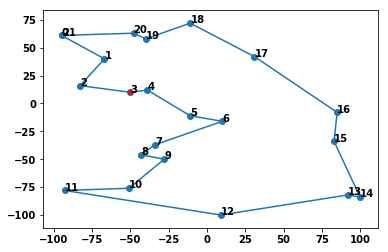

In [170]:
X = [p[0] for p in one_point_search]
Y = [p[1] for p in one_point_search]
plt.plot(X,Y)
plt.scatter(X,Y)
plt.plot(p_start[0],p_start[1],'r*')
for i in range(len(X)):
    plt.annotate(str(i), xy = (X[i], Y[i]), xytext = (X[i]+0.1, Y[i]+0.1))